In [1]:
import pandas as pd
import numpy as np

In [2]:
airline = pd.read_csv('/Users/shikharghimire/Desktop/TimeSeries-Practice/data/airline_passengers.csv',index_col='Month',parse_dates = True)

In [3]:
airline #There are few missing datas in this dataset so let's use dropna() to solve it

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
airline = airline.dropna()

In [5]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


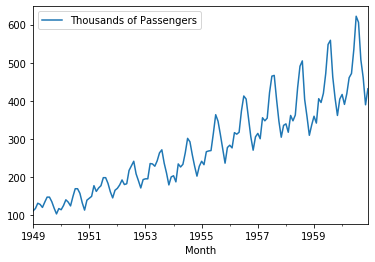

In [6]:
airline.plot()

In [7]:
#Trend is increasing at slightly higher rate than just linear so let's use multiplicative model for this
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
result = seasonal_decompose(airline['Thousands of Passengers'], model = 'multiplicative')

In [9]:
result #looking at result by itself won't show any output 

In [10]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [11]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [12]:
result.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

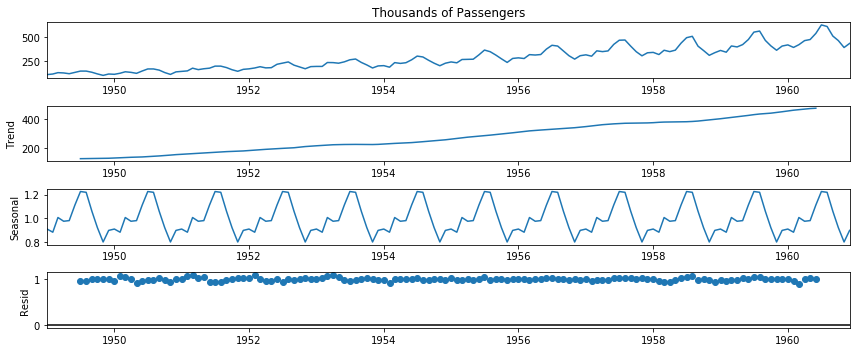

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

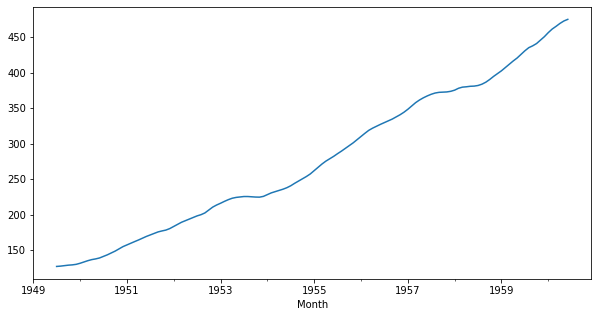

In [20]:
#You can also plot individually
result.trend.plot(figsize=(10,5))